<img style="float: right;" width = 450 src="ternary_uk.png"> 

# Ternary Soil Plots

### Generating Soil Texture Ternary Plots with Python



A soil texture ternary plot is a graphical representation of the relative proportions of sand, silt, and clay in a soil sample. These three components are considered the main indicators of soil texture and are used to classify soils into different texture classes. 

The plot is arranged in the shape of a triangle, with the three corners representing sand, silt, and clay, respectively. Each point within the triangle represents a unique combination of the three components, and the relative position of a point within the triangle indicates the relative proportions of the components in the soil sample. This type of plot is often used in soil science to quickly and easily visualize the texture of a soil sample.

The aim of this data analysis session is to plot a soil texture ternary plot of the data you have collected in the workshop to provide a visual comparison of your samples.

### 1.1 Download all group's soil structure data

Download the all data from the workshop by running the code in the cell below. This code used a Python module called `requests` to download the Excel file from SharePoint and to save it locally.




In [9]:
#download shared group data

import requests
import pandas as pd

file_url ='https://uoe-my.sharepoint.com/:x:/g/personal/gcowan2_ed_ac_uk/ESBibQzeto5LiHi2Xkz04vYB688A_g18V71p_lX4Xi7W1Q?download=1'

image_name = 'soil_data_groups.xlsx'
r = requests.get(file_url, stream=True)
with open(image_name, 'wb') as f:
    for chunk in r.iter_content():
        f.write(chunk)


### 1.2 Check the downloaded data

You previously used the pandas method `read_excel` to read data into a dataframe during the Pseudomonas Analysis in Variation 1. 

Write Python code in the cell below to load the data in soil_data_groups.xlsx into a dataframe called `soil_df`, then print the contents of the dataframe.

In [10]:
#Write your code here


In [11]:
import pandas as pd
soil_df =pd.read_excel('soil_data_groups.xlsx')
print(soil_df)

   sand  silt  clay  om           group box_label    soiltype
0    60    24    16  12  AmazingAmoebae         A   clay loam
1    91     5     4   2  AmazingAmoebae         B        sand
2     0    55    45   6  AmazingAmoebae         C  silty clay


### 1.3 Identify the types of variable your data contains

In Variation 1, you learned that there are two main types of variable, **categorical variables** and **numerical variables**.

Categorical variables can be either **nominal** and **ordinal**, and numerical variables can be either continuous or discrete. 

If you are unsure of these definitions, check Self Study Notebook 2.4 from Variation 1.

Identify the types of variables contained in the following columns and write them in the text box below.


### 1.4 Plot own group's data as ternary plot

The graphing libraries that we usually use (e.g. seaborn or matplotlib) do not have a specific function that enables us to easily plot a soil texture ternary plot. Here we will instead import a custom module that has been designed for the purpose (the source is available on Github at https://github.com/mishagrol/SoilTriangle).

Edit the code block below to insert your group name in the line `df = df.query('group == "AmazingAmoebae"')`. Run the code block to produce the graph. Try commenting out the line you previously edited by adding a `#` symbol at the start of the line, then rerun the code. What does this do?


   sand  silt  clay  om           group box_label    soiltype  \
0    60    24    16  12  AmazingAmoebae         A   clay loam   
1    91     5     4   2  AmazingAmoebae         B        sand   
2     0    55    45   6  AmazingAmoebae         C  silty clay   

               site  
0  AmazingAmoebae A  
1  AmazingAmoebae B  
2  AmazingAmoebae C  


ValueError: invalid mode: 'rU'

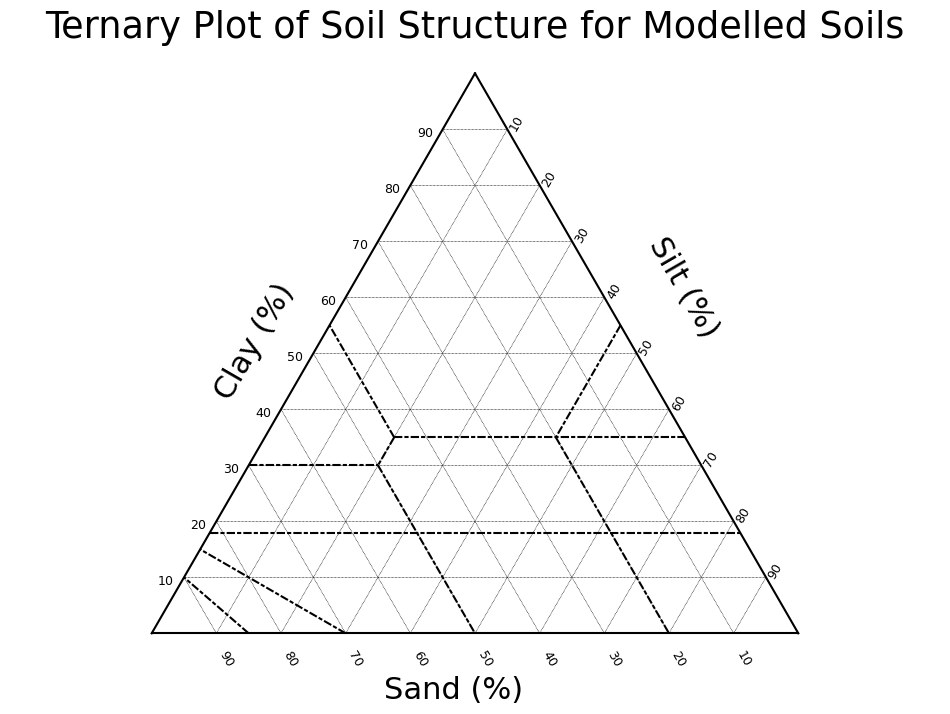

In [13]:
#This code imports the libraries that allow Python to draw a Triangle Plot

from trianglegraphgc import SoilTrianglePlot
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#set the size of the plot
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 22})

#This graphing module only takes data in the form of a csv
#This code block opens the excel file and saves it as a csv 
#It also uses a method called .query() to select only data from you group

df=pd.read_excel('soil_data_groups.xlsx')

df['site']=df['group']+' '+df['box_label'].map(str)
df = df.query('group == "AmazingAmoebae"') ##EDIT THIS LINE
print(df)
df.to_csv('soil_data_own_group.csv', index=False)

#generate the plot
tp = SoilTrianglePlot('Ternary Plot of Soil Structure for Modelled Soils')
tp.soil_categories(country='Britain')
tp.scatter_from_csv('soil_data_own_group.csv', hue='om', tags='site')
tp.colorbar('Organic matter (%)')
tp.show('triangleplot_british')

#Save the plot as a JPEG file (you could also save as a png or PDF)
plt.savefig('my_ternary_plot.jpeg')

# Plot bar chart of own group data only

In Variation 1, you used Seaborn to plot histograms. The code in the cell below uses Pandas to draw a stacked bar graph of the different soil conditions your group has modelled. It reads in data from the csv that you created in the previous code cell (called `soil_data_own_group.csv`).

1. Run the code to see the result. 
2. The plot does not have a y axis label: edit the code to add an appropriate y axis label then rerun the code. 

We will explore different types of plot in the lecture in week 2. 

In [ ]:
# Bar charts

# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create data
df = pd.read_csv("soil_data_own_group.csv")
# view data
print(df)
 
# plot data in stack manner of bar type
df[['sand', 'silt', 'clay', 'om', 'soiltype']].plot(x='soiltype', kind='bar', stacked=True, title='Composition of modelled soil types');
plt.xlabel("Soil Type")
plt.show()

### How does your data compare to other groups?

In this comparison, we want to see how the data from different groups compares. To be able to compare different groups' data, we need to plot comparable data on the same plot. In this case, it makes sense to draw a different plot for each box label in the dataset. 

We can't know in advance what soil types groups will have entered, so we can read this directly from the data. In the code below, `df.box_label.unique()` returns a list of all the unique box_label ids in the group dataset. The code uses a loop to loop through each of those box labels. Since the graph plotting code is in in the repeated block of that loop, the code draws a different graph for each box label. 

We will explore the use of loops to plot graphs further in the lecture in week 2. 

In [ ]:
# Use single spreadsheet for groups
#Loops through different box labels and plot data from all groups that have studied that soil type
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# read data into a dataframe of all groups
df = pd.read_excel("soil_data_groups.xlsx")
 
for box in df.box_label.unique():
    print(box) #Print label for box
    df.query('box_label == @box')[['sand', 'silt', 'clay', 'om', 'soiltype', 'group']].plot(x='group', kind='bar', stacked=True)
    plt.xlabel("Group")
    plt.ylabel("Count")
    plt.title(f"Soil composition for boxes labelled {box}")
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()

**Group discussion questions**

Once you have plotted all groups' data, discuss the following questions as a group:
 * Did you data agree with all groups? What variation did you see, and what do you think caused that variation?
 * What did each chart allow you to tell about your data? What other types of chart could you use?
 
 

